<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 04 - Data analyzing
</div>

**Khai báo (những) thư viện cần thiết**

In [231]:
import warnings 
import textwrap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
warnings.filterwarnings('ignore')

# Cài đặt hàm auto-wrap text cho label, phục vụ việc vẽ và trực quan dữ liệu
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

# **Đọc dữ liệu đã được xử lý**

Chúng ta sẽ tiến hành đọc dữ liệu đã xử lý và được sao lưu trong `./Data/processed_data.csv`. Dữ liệu này được đọc và lưu trong biến `df_`.

In [233]:
df_ = pd.read_csv('Data/processed_data.csv')
df_.sample(5)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,country_work,work_position,remote_flag
1403,0,6-25,1.0,No,I am not sure,Yes,No,I don't know,Somewhat difficult,Yes,...,Yes,1,Often,Often,27,Male,India,India,Front-end Developer|Back-end Developer,Sometimes
1018,0,100-500,1.0,I don't know,No,No,I don't know,I don't know,Somewhat difficult,Yes,...,No,0,Not applicable to me,Not applicable to me,48,Male,United Kingdom,United Kingdom,Front-end Developer|Back-end Developer|Dev Eva...,Sometimes
536,0,26-100,1.0,No,I am not sure,No,No,I don't know,Somewhat easy,Yes,...,Yes,1,Sometimes,Often,40,Female,United States of America,United States of America,Supervisor/Team Lead|Back-end Developer,Never
1253,0,100-500,0.0,Yes,No,Yes,I don't know,Yes,Very easy,No,...,No,0,Sometimes,Sometimes,43,Male,Denmark,Denmark,Back-end Developer,Sometimes
532,0,26-100,0.0,I don't know,No,No,No,I don't know,Very difficult,Maybe,...,Yes,1,Never,Rarely,27,Male,United States of America,United States of America,Designer|Front-end Developer|Back-end Develope...,Never


- Ở phân tích này, ta chỉ quan tâm đến những câu trả lời khảo sát mà ví trị công việc thuộc lĩnh vực CNTT.

In [234]:
tech_list = []
techs = ['Back-end', 'Front-end', 'Dev', 'DevOps']
for tech in techs:
    tech_list.append(df_[df_['work_position'].str.contains(tech)]['work_position'].tolist())
    
# remove duplicate keys in the list
flat_list = [item for sublist in tech_list for item in sublist]
flat_list = list(dict.fromkeys(flat_list))

# drop rows that are not in the list
df_ = df_[df_['work_position'].isin(flat_list)]

# **Analyzing**

## **_Câu hỏi số 01_**
**Nhân viên làm việc trong lĩnh vực Công nghệ thông tin ở khu vực nào cảm thấy quan ngại chia sẻ sức khỏe tâm thần với mọi người trong cùng môi trường làm việc nhất?**

- Trả lời câu hỏi này giúp các công ty hiểu được tâm lý nhân việc về việc chia sẻ bệnh lý trong môi trường làm việc của họ. Từ đó có thể phát hiện sớm các lý do và đưa ra giải pháp để cải thiện chất lượng kịp thời, đảm bảo quyền lợi người lao động.
- Để trả lời câu hỏi này, chúng ta cần phải phân chia dữ liệu khảo sát người lao động lao động giữa các khu vực `country_work` thông qua các `mh_discussion_neg_impact`, `ph_discussion_neg_impact`, `mh_discussion_cowork`, `mh_discussion_supervisor`.

### Xử lý dữ liệu

- Chọn các đặc trưng cần thiết.

In [235]:
analyz1_df = df_.copy()[['mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork', 'mh_discussion_supervisor', 'country_work']]

- Phân chia các nơi làm việc của người lao động theo các châu lục.
    + Để làm việc này, đầu tiên chúng ta cần xem giá trị `unique` của đặc trưng `country_work`.

In [236]:
print(analyz1_df['country_work'].unique())

['United Kingdom' 'United States of America' 'Canada' 'Germany'
 'Netherlands' 'Czech Republic' 'Lithuania' 'France' 'Venezuela' 'Poland'
 'Brazil' 'Denmark' 'Belgium' 'Sweden' 'Russia' 'Spain'
 'United Arab Emirates' 'Mexico' 'Australia' 'Switzerland' 'India'
 'Ireland' 'Italy' 'Finland' 'Colombia' 'Costa Rica' 'Vietnam' 'Bulgaria'
 'South Africa' 'Slovakia' 'Austria' 'Bangladesh' 'Norway' 'Greece'
 'Other' 'New Zealand' 'Iran' 'Israel' 'Japan' 'Ecuador' 'Romania'
 'Bosnia and Herzegovina' 'Chile' 'Guatemala' 'Serbia' 'Estonia']


- Phân chia các nơi làm việc của người lao động theo các châu lục.
    + Tiếp theo, chúng ta sẽ điền các châu lục tương ứng của từng quốc gia.

In [237]:
areas = ['Europe', 'North America', 'North America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'South America', 'Europe', 'South America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'North America', 'Oceania', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'South America', 'North America', 'Asia', 'Europe', 'Africa', 'Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'Unknown', 'Oceania', 'Asia', 'Asia', 'Asia', 'South America', 'Europe', 'Europe', 'South America', 'North America', 'Europe', 'Europe']
countries = df_['country_work'].unique()

# Create a dictionary with areas as keys and countries as values
replace_dict = pd.DataFrame({'country': countries, 'area': areas}).set_index('country').to_dict()

# Match the country with the area
analyz1_df['area'] = analyz1_df['country_work'].map(replace_dict['area'])

analyz1_df.sample(5)

,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervisor,country_work,area
74,No,No,Maybe,Yes,United States of America,North America
1050,No,No,No,No,Italy,Europe
377,Yes,Maybe,Maybe,Maybe,United States of America,North America
866,Yes,Maybe,No,No,United States of America,North America
337,NaN,NaN,NaN,NaN,Sweden,Europe


- Xóa bỏ những dữ liệu không cần thiết.
    + Bởi vì trong đặc trưng `country_work` chứa tên các quốc gia không tồn tại và số lượng này khá ít nên chúng ta sẽ không khảo sát những dòng dữ liệu này.
    + Những dòng bị thiếu giá trị (missing value) là những khảo sát của chủ doanh nghiệp. Ở câu hỏi này, chúng tôi đang quan tâm đến sự e ngại của nhân viên/người lao động trong môi trường làm việc để có thể phát hiện sớm và hỗ trợ phúc lợi kịp thời. Vì vậy, những dòng dữ liệu thiếu này nếu điền giá trị dựa trên một cơ sở nào đó thì nó vẫn không đúng với mục đích câu hỏi. Chúng ta sẽ xóa những dòng dữ liệu này.

In [238]:
# Remove rows with 'Unknown' area
analyz1_df = analyz1_df[analyz1_df['area'] != 'Unknown']

# Delete rows with missing values
analyz1_df = analyz1_df.dropna()

# Statistics number of missing values in each column
print('\nNumber of missing values in each column:\n', analyz1_df.isnull().sum())


Number of missing values in each column:
 mh_discussion_neg_impact    0
ph_discussion_neg_impact    0
mh_discussion_cowork        0
mh_discussion_supervisor    0
country_work                0
area                        0
dtype: int64


- Loại bỏ cột `country_work` sau khi đã thay thế bằng châu lục.

In [239]:
# Drop `country_work` column and sort by `area`
analyz1_df = analyz1_df.drop('country_work', axis=1).sort_values('area')
analyz1_df.sample(5)

,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervisor,area
1298,No,No,No,Maybe,North America
74,No,No,Maybe,Yes,North America
1113,No,No,Yes,Yes,North America
1336,No,No,Maybe,Maybe,Europe
555,Yes,No,Maybe,No,North America


### Tính toán và xử lý số liệu

- Xem các giá trị unique của từng cột được nhóm theo châu lục.

In [240]:
def value_counts_groupby(col, df: pd.DataFrame=analyz1_df):
    if col.name == 'area':
        return pd.Series([np.NaN]*len(df['area'].unique()), index=df['area'].unique())
    name_feature = col.name
    temp = df[[name_feature, 'area']]
    temp = temp.groupby(['area']).agg({name_feature: lambda x: x.value_counts().to_dict()})
    return pd.Series(temp[name_feature], index=temp.index)

anal1_profile = analyz1_df.apply(lambda col: value_counts_groupby(col)).drop('area', axis=1)
anal1_profile

,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervisor
Africa,"{'No': 2, 'Yes': 2}","{'No': 2, 'Maybe': 2}","{'No': 3, 'Yes': 1}","{'Yes': 2, 'No': 2}"
Asia,"{'Maybe': 6, 'No': 4, 'Yes': 3}","{'No': 7, 'Maybe': 6}","{'No': 7, 'Maybe': 3, 'Yes': 3}","{'Yes': 5, 'No': 5, 'Maybe': 3}"
Europe,"{'No': 99, 'Maybe': 93, 'Yes': 43}","{'No': 181, 'Maybe': 47, 'Yes': 7}","{'Maybe': 97, 'No': 74, 'Yes': 64}","{'Maybe': 85, 'Yes': 84, 'No': 66}"
North America,"{'Maybe': 257, 'No': 217, 'Yes': 107}","{'No': 423, 'Maybe': 137, 'Yes': 21}","{'Maybe': 250, 'No': 201, 'Yes': 130}","{'Yes': 215, 'Maybe': 204, 'No': 162}"
Oceania,"{'No': 8, 'Maybe': 7, 'Yes': 5}","{'No': 14, 'Maybe': 5, 'Yes': 1}","{'Maybe': 9, 'No': 6, 'Yes': 5}","{'Yes': 10, 'Maybe': 8, 'No': 2}"
South America,"{'Yes': 5, 'Maybe': 4, 'No': 3}","{'No': 9, 'Maybe': 2, 'Yes': 1}","{'No': 7, 'Maybe': 3, 'Yes': 2}","{'No': 6, 'Yes': 5, 'Maybe': 1}"


- Từ bảng trên, lưu trữ `dataframe` tổng số lượng câu trả lời mỗi `dict` và `dataframe` chứa `dict` câu trả lời `Yes` và `Maybe`.

In [241]:
# Store ratio 'Yes' and 'Maybe' answer in a new dataframe
anal1_ratio = anal1_profile.apply(lambda col: col.apply(lambda dict: 1-dict['No']/sum(dict.values())))*100
anal1_ratio

,mh_discussion_neg_impact,ph_discussion_neg_impact,mh_discussion_cowork,mh_discussion_supervisor
Africa,50.000000,50.000000,25.000000,50.000000
Asia,69.230769,46.153846,46.153846,61.538462
Europe,57.872340,22.978723,68.510638,71.914894
North America,62.650602,27.194492,65.404475,72.117040
Oceania,60.000000,30.000000,70.000000,90.000000
South America,75.000000,25.000000,41.666667,50.000000


### Trực quan hóa

#### _Tổng quan về thuộc tính trực quan_

- Số lượng câu trả lời của từng quan điểm trong cùng một khu vực có bằng nhau hay không.

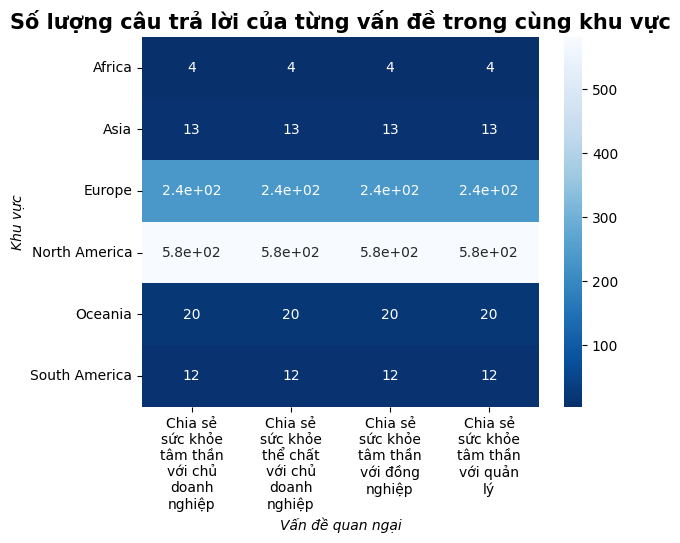

In [242]:
# Tính số lượng câu trả lời ở từng điểm dữ liệu
anal1_sum = anal1_profile.apply(lambda col: col.apply(lambda dict: sum(dict.values())))
anal1_sum.columns = ['Chia sẻ sức khỏe tâm thần với chủ doanh nghiệp', 'Chia sẻ sức khỏe thể chất với chủ doanh nghiệp', 'Chia sẻ sức khỏe tâm thần với đồng nghiệp', 'Chia sẻ sức khỏe tâm thần với quản lý']

# Trực quan hóa dữ liệu
ax = sns.heatmap(anal1_sum, cmap='Blues_r', annot=True);
plt.xlabel('Vấn đề quan ngại', fontdict={'style': 'italic'}); plt.ylabel('Khu vực', fontdict={'style': 'italic'})
wrap_labels(ax, 10)
plt.title('Số lượng câu trả lời của từng vấn đề trong cùng khu vực',
          fontdict={'size': 15, 'weight': 'bold'});


- Số lượng người tham gia khảo sát ở từng châu lục

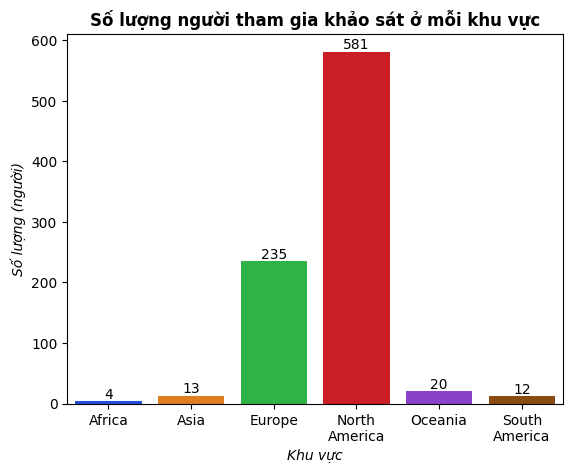

In [243]:
number_each_area = pd.Series(anal1_sum['Chia sẻ sức khỏe thể chất với chủ doanh nghiệp'], index=anal1_sum.index)

# Thống kê số lượng người tham gia khảo sát ở từng khu vực
ax = sns.barplot(x=number_each_area.index, y=number_each_area.values, palette='bright')
ax.bar_label(ax.containers[0])
ax.set_title('Số lượng người tham gia khảo sát ở mỗi khu vực', fontdict={'weight': 'bold', 'size': 12})
plt.xlabel('Khu vực', fontdict={'style': 'italic'}); plt.ylabel('Số lượng (người)', fontdict={'style': 'italic'})
wrap_labels(ax, 10)
plt.show()

- Sự tương quan về vấn đề quan ngại chia sẻ ở các khu vực trong mỗi giá trị (unique) của câu trả lời.

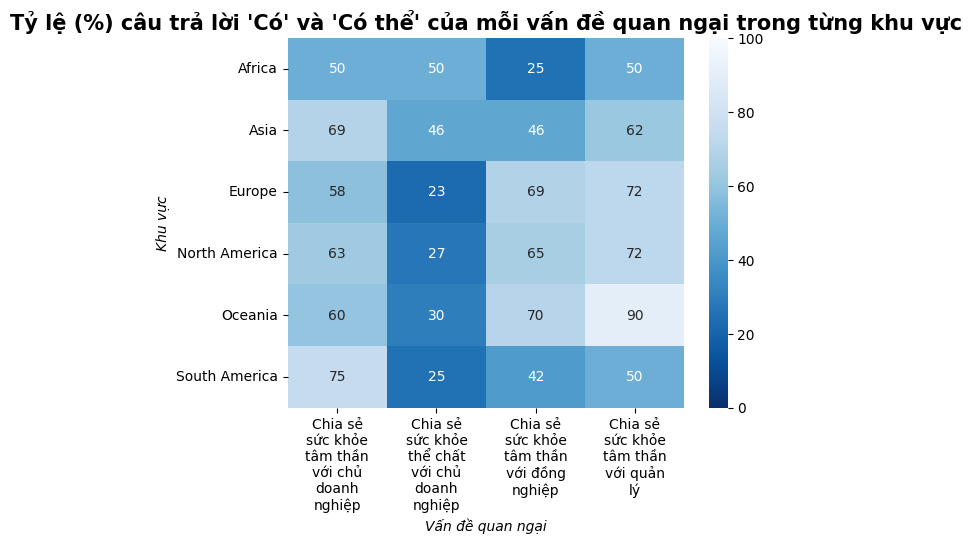

In [244]:
anal1_ratio.columns = ['Chia sẻ sức khỏe tâm thần với chủ doanh nghiệp', 'Chia sẻ sức khỏe thể chất với chủ doanh nghiệp', 'Chia sẻ sức khỏe tâm thần với đồng nghiệp', 'Chia sẻ sức khỏe tâm thần với quản lý']

# Trực quan hóa dữ liệu
ax = sns.heatmap(anal1_ratio, cmap='Blues_r', annot=True, vmin=0, vmax=100);
plt.xlabel('Vấn đề quan ngại', fontdict={'style': 'italic'}); plt.ylabel('Khu vực', fontdict={'style': 'italic'})
wrap_labels(ax, 10)
plt.title('Tỷ lệ (%) câu trả lời \'Có\' và \'Có thể\' của mỗi vấn đề quan ngại trong từng khu vực',
          fontdict={'size': 15, 'weight': 'bold'});

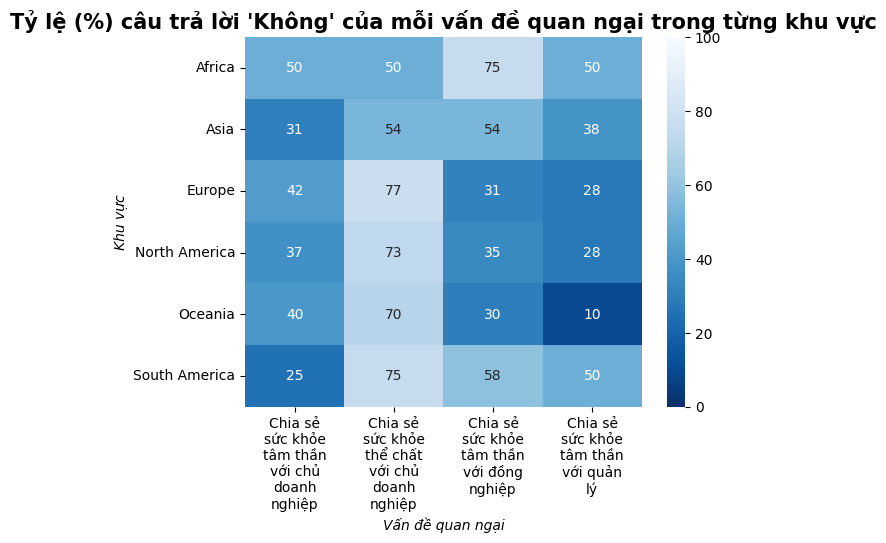

In [245]:
anal1_no = anal1_profile.apply(lambda col: col.apply(lambda dict: dict['No']/sum(dict.values())))*100
anal1_no.columns = ['Chia sẻ sức khỏe tâm thần với chủ doanh nghiệp', 'Chia sẻ sức khỏe thể chất với chủ doanh nghiệp', 'Chia sẻ sức khỏe tâm thần với đồng nghiệp', 'Chia sẻ sức khỏe tâm thần với quản lý']

# Trực quan hóa dữ liệu
ax = sns.heatmap(anal1_no, cmap='Blues_r', annot=True, vmin=0, vmax=100);
plt.xlabel('Vấn đề quan ngại', fontdict={'style': 'italic'}); plt.ylabel('Khu vực', fontdict={'style': 'italic'})
wrap_labels(ax, 10)
plt.title('Tỷ lệ (%) câu trả lời \'Không\' của mỗi vấn đề quan ngại trong từng khu vực',
          fontdict={'size': 15, 'weight': 'bold'});

#### _Kết quả trực quan_

- Trực quan sự quan ngại của người tham gia khảo sát.

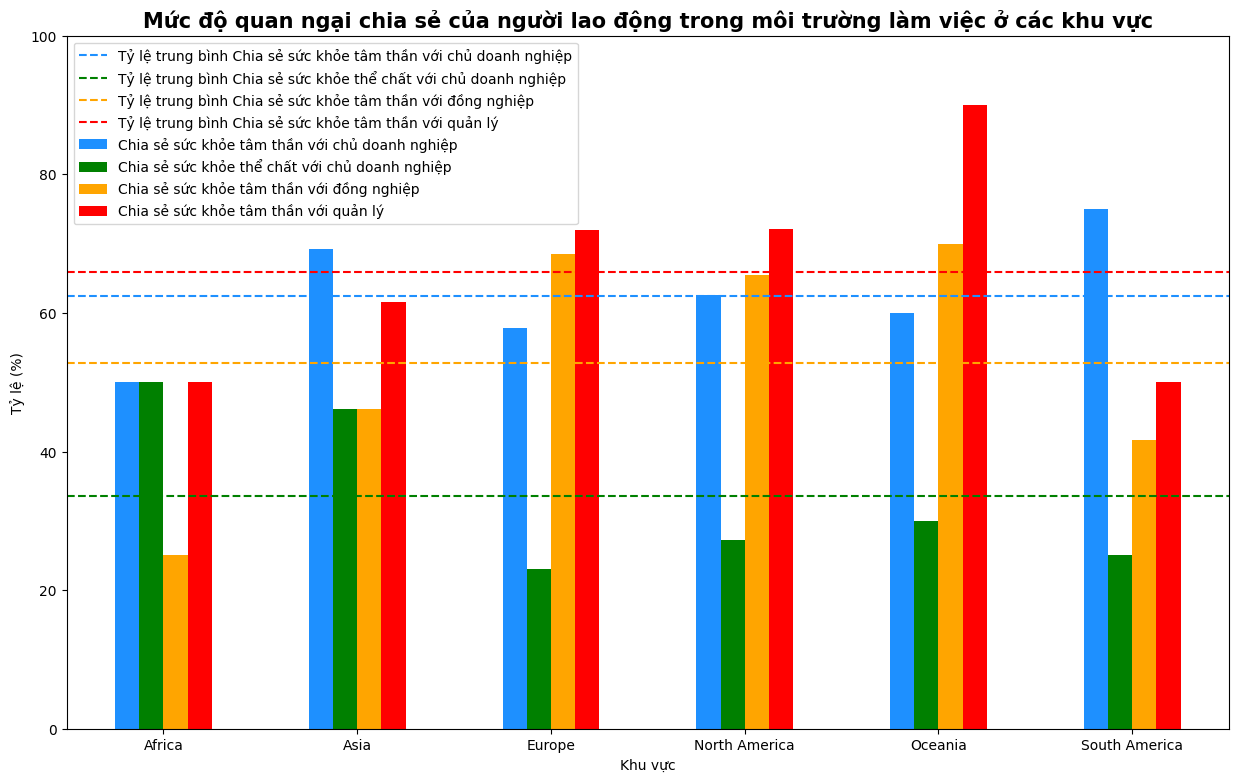

In [246]:
anal1_plot = anal1_ratio.reset_index(names='area')
anal1_plot.columns = ['Khu vực', 'Chia sẻ sức khỏe tâm thần với chủ doanh nghiệp', 'Chia sẻ sức khỏe thể chất với chủ doanh nghiệp', 'Chia sẻ sức khỏe tâm thần với đồng nghiệp', 'Chia sẻ sức khỏe tâm thần với quản lý']

color_ = ['dodgerblue', 'green', 'orange', 'red']
color_dict = pd.Series(color_, index=anal1_plot.columns[1:]).to_dict()

anal1_plot.plot(x='Khu vực',
                y=['Chia sẻ sức khỏe tâm thần với chủ doanh nghiệp', 'Chia sẻ sức khỏe thể chất với chủ doanh nghiệp', 'Chia sẻ sức khỏe tâm thần với đồng nghiệp', 'Chia sẻ sức khỏe tâm thần với quản lý'],
                kind='bar', figsize=(15, 9), color=color_,
                ylabel='Tỷ lệ (%)', ylim=(0, 100),
                xlabel='Khu vực');

# Đường ngang là giá trị trung bình của mỗi feature
for feature in anal1_plot.columns[1:]:
    mean = anal1_plot[feature].mean()
    plt.axhline(mean, linestyle='--', color=color_dict[feature], label=f'Tỷ lệ trung bình {feature}')
plt.legend();
plt.xticks(rotation = 0);
plt.title('Mức độ quan ngại chia sẻ của người lao động trong môi trường làm việc ở các khu vực', fontdict={'size': 15, 'weight': 'bold'});

#### **_Đánh giá chung:_**
- **Tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần và sức khỏe thể chất đều khá cao ở tất cả các châu lục, với mức trung bình trên $50\%$.** Điều này cho thấy rằng việc chia sẻ thông tin về sức khỏe tâm thần và sức khỏe thể chất tại nơi làm việc vẫn còn là một vấn đề đáng lo ngại.
- **Có sự khác biệt đáng kể về tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần và sức khỏe thể chất giữa các châu lục.** Cụ thể, châu Phi có tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần thấp nhất ($20\%$ - $50\%$), trong khi châu Úc có tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần cao nhất ($30\%$ - $90\%$).
- **Tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần cao hơn tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe thể chất ở tất cả các châu lục.** Điều này cho thấy rằng sức khỏe tâm thần vẫn còn là một vấn đề nhạy cảm hơn sức khỏe thể chất tại nơi làm việc.
- **Tỷ lệ người lao động ngại chia sẻ thông tin về sức khỏe tâm thần với chủ doanh nghiệp hay người quản lý cao hơn nhiều so với đồng nghiệp.** Điều này cho thấy còn tồn tại nhiều lý do khiến người lao động bị rào cản chia sẻ vấn đề sức khỏe của họ. Nó đang làm cho người lao động không được hưởng quyền lợi chính đáng của họ.
- **Số lượng câu trả lời ở mỗi khu vực có sự chênh lệch rõ rệt**. Điều này cho thấy một số vấn đề:
    + Ở các khu vực có số lượng ít câu trả lời, người lao động chưa thực sự quan tâm đến sức khỏe tâm thần.
    + Người lao động ở các khu có số lượng ít câu trả lời đang quan ngại chia sẻ ý kiến bản thân về sức khỏe tâm thần trong môi trường làm việc.
    + Khảo sát này chưa thực sự được phổ biến nhiều với người lao động ở các khu có số lượng ít câu trả lời.
    + Nó dẫn đến sự đánh không phù hợp đối với các khu vực có số lượng câu trả lời quá ít.

$\Rightarrow$ Các công ty/doanh nghiệp và quản lý cấp cao chưa thật sự quan tâm về vấn đề sức khỏe tinh thần, vô hình chung tạo rào cản khi nhân viên trong công ty muốn chia sẻ với họ. Bên cạnh đó, môi trường làm việc không thân thiện cũng khiến đồng nghiệp trong cùng công ty ít chia sẻ thông tin về sức khỏe tâm thần với nhau. Vì vậy, đây có thể là một trong các lý do những nhân viên quan ngại không được tiếp xúc với nhiều nguồn thông tin cũng như sự hỗ trợ về sức khỏe tâm thần như một lợi ích chính đáng của họ.

## **_Câu hỏi số 02_**
**Tỷ lệ người tham gia khảo sát mà họ nghĩ rằng có thể hoặc đang gặp vấn đề về sức khỏe tâm thần hiện nay như thế nào?**

- Trả lời câu hỏi này sẽ cái nhìn tổng quan về lao động làm việc trên toàn cầu, phát hiện và tìm hiểu sớm lý do để đưa ra giải pháp đảm bảo quyền lợi người lao động.
- Để trả lời câu hỏi này, chúng ta dựa trên `mh_disorder_current` và khảo sát thông qua các `age`, `sex`, `country_work` và `remote_flag`.

### Xử lý dữ liệu

- Chọn các đặc trưng cần thiết.

In [247]:
anal2_df = df_.copy()[['mh_disorder_current', 'age', 'sex', 'country_work', 'remote_flag']]
anal2_df.sample(5)

,mh_disorder_current,age,sex,country_work,remote_flag
1043,Maybe,41,Male,South Africa,Sometimes
392,Yes,32,Male,United States of America,Always
689,No,27,Male,United States of America,Never
492,Yes,44,Male,United States of America,Always
472,No,35,Male,United States of America,Sometimes


- Xử lý giá trị bị thiếu trong dữ liệu.

In [248]:
# Statistics number of missing values in each column
print('Number of missing values in each column:\n', anal2_df.isnull().sum())

# Fill np.NaN by mode each column
anal2_df = anal2_df.fillna(anal2_df.mode().iloc[0])

# Statistics number of missing values in each column
print('\nNumber of missing values in each column after dropping rows:\n', anal2_df.isnull().sum())

Number of missing values in each column:
 mh_disorder_current    0
age                    0
sex                    2
country_work           0
remote_flag            0
dtype: int64

Number of missing values in each column after dropping rows:
 mh_disorder_current    0
age                    0
sex                    0
country_work           0
remote_flag            0
dtype: int64


- Phân chia các nơi làm việc của người lao động theo các châu lục.

In [249]:
areas = ['Europe', 'America', 'America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'America', 'Europe', 'America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'America', 'Oceania', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'America', 'America', 'Asia', 'Europe', 'Africa', 'Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'Unknown', 'Oceania', 'Asia', 'Asia', 'Asia', 'America', 'Europe', 'Europe', 'America', 'America', 'Europe', 'Europe']
countries = df_['country_work'].unique()

# Create a dictionary with areas as keys and countries as values
replace_dict = pd.DataFrame({'country': countries, 'area': areas}).set_index('country').to_dict()

# Match the country with the area
anal2_df['country_work'] = anal2_df['country_work'].map(replace_dict['area'])

# Drop the rows that are 'Unknown' in the 'country_work' column
anal2_df = anal2_df[anal2_df['country_work'] != 'Unknown']

anal2_df.head(10)

,mh_disorder_current,age,sex,country_work,remote_flag
0,No,39,Male,Europe,Sometimes
1,Yes,29,Male,America,Never
2,No,38,Male,Europe,Always
4,Yes,43,Female,America,Sometimes
5,Yes,42,Male,Europe,Sometimes
6,No,30,Male,America,Sometimes
7,Yes,37,Female,America,Always
8,Yes,44,Female,America,Sometimes
9,Yes,30,Male,America,Always
10,Yes,28,Male,America,Never


- Chia độ tuổi người tham gia khảo sát thành 3 khoảng độ tuổi $\leq30$, $(30;60]$ và $>60$.

In [250]:
# Divied age column into three age groups (<30, 30-60, >60)
anal2_df['age'] = pd.cut(anal2_df['age'], bins=[0, 30, 60, 100], labels=['≤ 30', '31 - 60', '> 60'])

anal2_df.head(10)

,mh_disorder_current,age,sex,country_work,remote_flag
0,No,31 - 60,Male,Europe,Sometimes
1,Yes,≤ 30,Male,America,Never
2,No,31 - 60,Male,Europe,Always
4,Yes,31 - 60,Female,America,Sometimes
5,Yes,31 - 60,Male,Europe,Sometimes
6,No,≤ 30,Male,America,Sometimes
7,Yes,31 - 60,Female,America,Always
8,Yes,31 - 60,Female,America,Sometimes
9,Yes,≤ 30,Male,America,Always
10,Yes,≤ 30,Male,America,Never


- Lưu trữ thông tin thống kê của các đặc trưng thành những `pd.Dataframe` riêng biệt

In [251]:
area_df = anal2_df[['mh_disorder_current', 'country_work']].groupby('country_work').value_counts().unstack().fillna(0)
area_df.columns.name = None
age_df = anal2_df[['mh_disorder_current', 'age']].groupby('age').value_counts().unstack().fillna(0)
age_df.columns.name = None
gender_df = anal2_df[['mh_disorder_current', 'sex']].groupby('sex').value_counts().unstack().fillna(0)
gender_df.columns.name = None
remoteness_df = anal2_df[['mh_disorder_current', 'remote_flag']].groupby('remote_flag').value_counts().unstack().fillna(0)
remoteness_df.columns.name = None

### Trực quan hóa dữ liệu

#### _Tổng quan về thuộc tính trực quan_

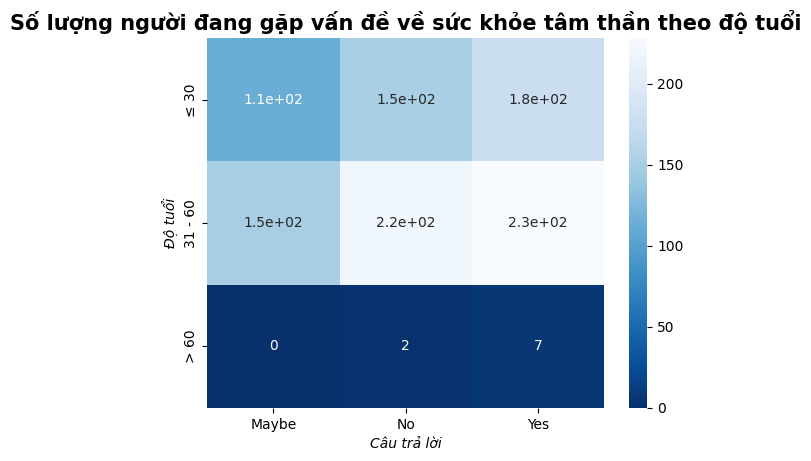

In [259]:
# Trực quan hóa dữ liệu
sns.heatmap(age_df, cmap='Blues_r', annot=True);
plt.xlabel('Câu trả lời', fontdict={'style': 'italic'}); plt.ylabel('Độ tuổi', fontdict={'style': 'italic'})
plt.title('Số lượng người đang gặp vấn đề về sức khỏe tâm thần theo độ tuổi',
          fontdict={'size': 15, 'weight': 'bold'});

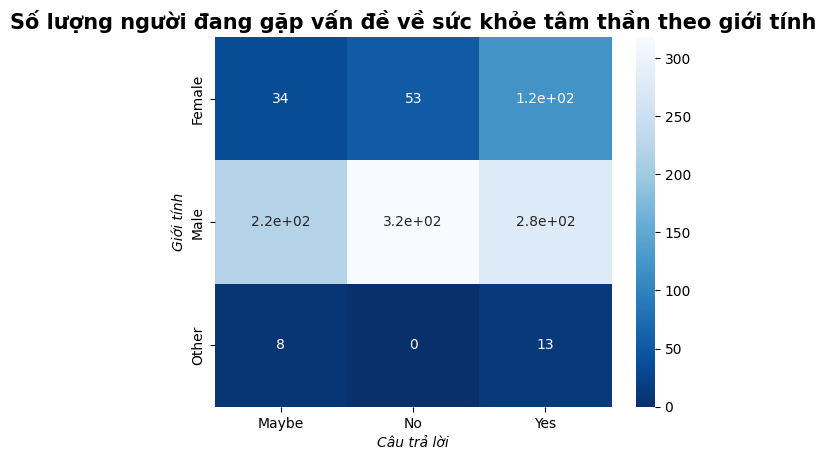

In [260]:
# Trực quan hóa dữ liệu
sns.heatmap(gender_df, cmap='Blues_r', annot=True);
plt.xlabel('Câu trả lời', fontdict={'style': 'italic'}); plt.ylabel('Giới tính', fontdict={'style': 'italic'})
plt.title('Số lượng người đang gặp vấn đề về sức khỏe tâm thần theo giới tính',
          fontdict={'size': 15, 'weight': 'bold'});

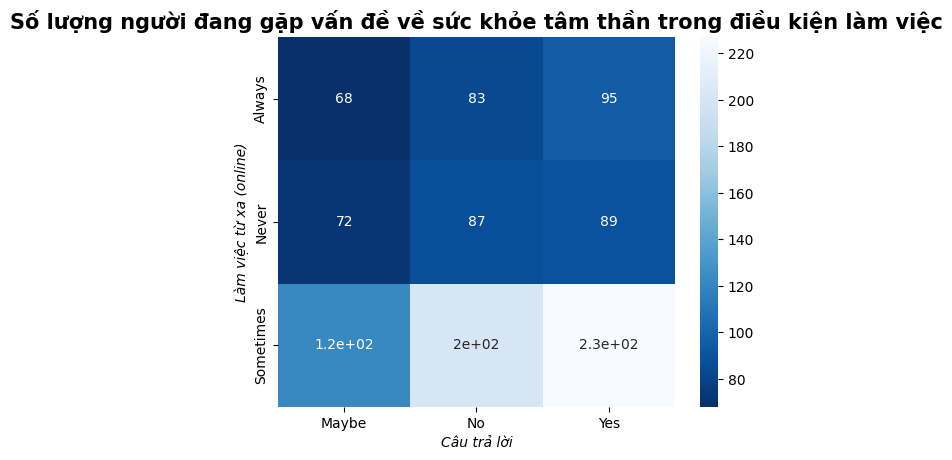

In [262]:
# Trực quan hóa dữ liệu
sns.heatmap(remoteness_df, cmap='Blues_r', annot=True);
plt.xlabel('Câu trả lời', fontdict={'style': 'italic'}); plt.ylabel('Làm việc từ xa (online)', fontdict={'style': 'italic'})
plt.title('Số lượng người đang gặp vấn đề về sức khỏe tâm thần trong điều kiện làm việc',
          fontdict={'size': 15, 'weight': 'bold'});

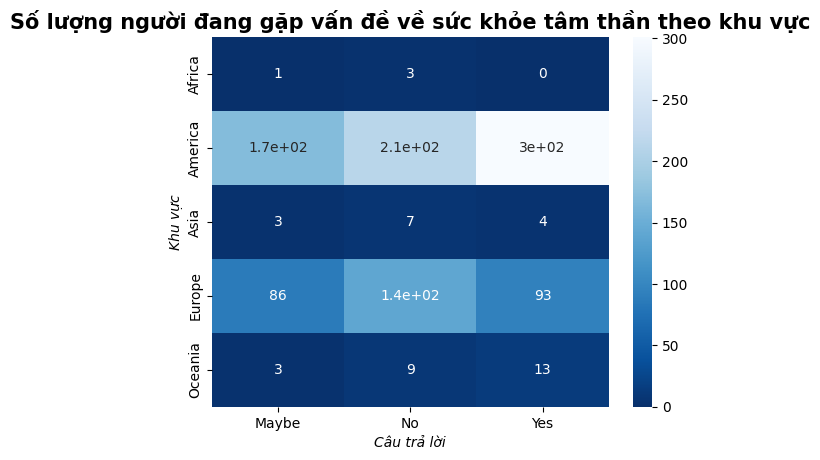

In [263]:
# Trực quan hóa dữ liệu
sns.heatmap(area_df, cmap='Blues_r', annot=True);
plt.xlabel('Câu trả lời', fontdict={'style': 'italic'}); plt.ylabel('Khu vực', fontdict={'style': 'italic'})
plt.title('Số lượng người đang gặp vấn đề về sức khỏe tâm thần theo khu vực',
          fontdict={'size': 15, 'weight': 'bold'});

#### _Kết quả trực quan_

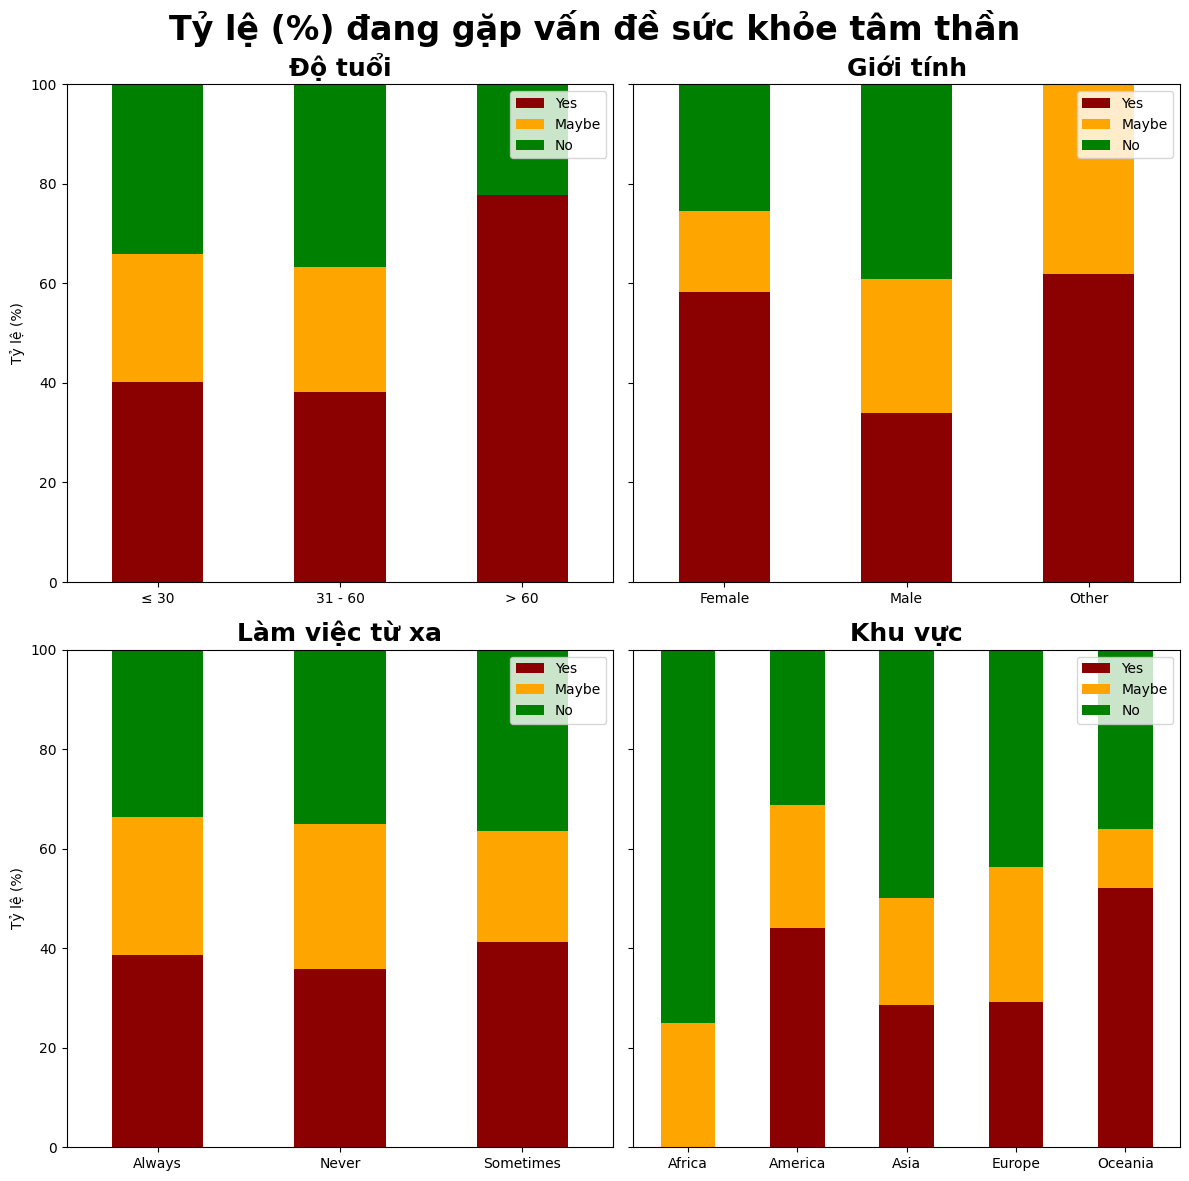

In [265]:
# Convert to percentage
age_perc = (age_df.div(age_df.sum(axis=1), axis=0) * 100).reset_index()
gender_perc = (gender_df.div(gender_df.sum(axis=1), axis=0) * 100).reset_index()
remoteness_perc = (remoteness_df.div(remoteness_df.sum(axis=1), axis=0) * 100).reset_index()
area_perc = (area_df.div(area_df.sum(axis=1), axis=0) * 100).reset_index()

color_ = ['darkred', 'orange', 'green']

# Plot 4 pie charts of age, gender, remote, area in a 2x2 grid
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharey=True)
fig.suptitle('Tỷ lệ (%) đang gặp vấn đề sức khỏe tâm thần', fontsize=24, fontweight='bold')

# Plot age_perc
age_perc.plot(x='age', y=['Yes', 'Maybe', 'No'], kind='bar', ax=ax[0, 0], stacked=True, rot=0, ylim=(0, 100), ylabel='Tỷ lệ (%)', xlabel='', color=color_);
ax[0, 0].set_title('Độ tuổi', fontdict={'weight': 'bold', 'size': 18});

# Plot gender_perc
gender_perc.plot(x='sex', y=['Yes', 'Maybe', 'No'], kind='bar', ax=ax[0, 1], stacked=True, rot=0, ylim=(0, 100), ylabel='Tỷ lệ (%)', xlabel='', color=color_);
ax[0, 1].set_title('Giới tính', fontdict={'weight': 'bold', 'size': 18});

# Plot remoteness_perc
remoteness_perc.plot(x='remote_flag', y=['Yes', 'Maybe', 'No'], kind='bar', ax=ax[1, 0], stacked=True, rot=0, ylim=(0, 100), ylabel='Tỷ lệ (%)', xlabel='', color=color_);
ax[1, 0].set_title('Làm việc từ xa', fontdict={'weight': 'bold', 'size': 18});

# Plot area_perc
area_perc.plot(x='country_work', y=['Yes', 'Maybe', 'No'], kind='bar', ax=ax[1, 1], stacked=True, rot=0, ylim=(0, 100), ylabel='Tỷ lệ (%)', xlabel='', color=color_);
ax[1, 1].set_title('Khu vực', fontdict={'weight': 'bold', 'size': 18});

fig.tight_layout()

#### **_Đánh giá chung:_**
- **Tỷ lệ người lao động cảm thấy hay đang có vấn đề tâm thần phân loại theo mọi khía cạnh đều mức trung bình khá cao, trên $50\%$.** Điều này cho thấy rằng người lao động có thể đang gặp nhiều tác nhân tiêu cực khiến họ cảm thấy hoặc đang gặp vấn đề về sức khỏe tâm thần.
    - _Theo độ tuổi:_ **Những người trên 60 tuổi đang có vấn đề về sức khỏe tâm thần khá cao**, cụ thể tỷ lệ này chiếm gần $80\%$ trong những người trên 60 tuổi tham gia khảo sát. Điều này cho thấy những người lao động lớn tuổi dễ bị ảnh hưởng tiêu cực khiến họ tổn thương về sức khỏe tâm thần.
    - _Theo giới tính:_ **Tỷ lệ những người thuộc cộng đồng LGBT cảm thấy bản thân đang gặp vấn đề sức khỏe tâm thần rất cao.** Cụ thể, khoảng $80\%$ người tham gia khảo sát họ cho rằng mình đang bị tổn thương về sức khỏe tâm thần, và $20\%$ còn lại cũng cho biết họ cảm thấy bản thân cũng đang có khả năng cao gặp vấn đề này. Đây là con số đáng báo động, cho thấy có nhiều lý do khiến những người thuộc LGBT gặp vấn đề sức khỏe tâm thần.
    - _Theo điều kiện làm việc:_ **Dù người tham gia khảo sát đang làm việc từ xa hay trực tiếp tại công ty đều gặp phải vấn đề về sức khỏe tâm thần trên $60\%$.** Có thể thấy rằng với mỗi hình thức làm việc luôn có một số nguyên nhân khiến bản thân họ cảm thấy tiêu cực và tổn thương sức khỏe tâm thần.
    - _Theo khu vực:_ **Khu vực châu Mỹ là nơi có nhiều người cảm thấy và đang gặp vấn đề về sức khỏe tâm thần.** Điều đó cho thấy rằng châu Mỹ có môi trường làm việc khắc nghiệt hơn so với các châu lục còn lại, đễ khiến con người bị tổn thương sức khỏe tâm thần.

$\Rightarrow$ Bất kỳ ai, dù ở độ tuổi, giới tính, điều kiện làm việc và khu vực nào hiện nay trên thế giới đều cảm thấy hoặc đang gặp vấn đề về sức khỏe tâm thần, chiếm tỷ lệ ở mức cao. Nó cho thấy những nguồn hỗ trợ sức khỏe tâm thần chưa được quan tâm sâu sắc và mọi người gặp nhiều khó khăn khi tiếp cận. Vì vậy cần phải cải thiện và hỗ trợ kịp thời để nâng cao chất lượng sức khỏe làm việc của người lao động trên toàn cầu.